In [1]:
# Data Preparation Libraries
import pandas as pd
import numpy as np
import datetime

# Data Profiling
import pandas_profiling

# Plot and Visualisations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
%matplotlib inline

# Notebook settings
import warnings
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)
warnings.filterwarnings('ignore')
import gc

# Modelling libraries
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#aici trebuie sa intro pe un link, sa alegi contul google si sa copiezi un cod pe care il pui in colab

In [4]:
link = 'https://drive.google.com/file/d/1Na3TmqqEluah4T-3hK2Zt1f25b-GbISE/view?usp=sharing' # linkul direct de la share
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
filename= 'application_train.csv'
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('application_train.csv')  

In [5]:
link = 'https://drive.google.com/file/d/1ZbDpWs2INahxf3B7rJobsqYvGaaivxeu/view?usp=sharing' # linkul direct de la share
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
filename= 'bureau.csv'
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bureau.csv')  

### Data Structure

<img src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" style="width:1000px;height:600px"/>

In [6]:
train = pd.read_csv('application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### Our objective now is to aggregate bureau data and to bring in our train dataset feature view

### 1. Step one handle Categorical Values from Bureau and Bureau Balance dataframes

- Introducing One Hot Encoding (more methods on Feature Engineering Chapter)

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" style="width:600px;height:200px"/>

In [8]:
cat_cols_bureau = bureau.select_dtypes(include='object').columns
cat_cols_bureau

Index(['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dtype='object')

In [9]:
for column in cat_cols_bureau:
    print(bureau[column].value_counts(normalize=True, dropna=False))
    print()
    print(40*'*')
    print()

Closed      0.628790
Active      0.367395
Sold        0.003803
Bad debt    0.000012
Name: CREDIT_ACTIVE, dtype: float64

****************************************

currency 1    0.999180
currency 2    0.000713
currency 3    0.000101
currency 4    0.000006
Name: CREDIT_CURRENCY, dtype: float64

****************************************

Consumer credit                                 7.291975e-01
Credit card                                     2.343209e-01
Car loan                                        1.613234e-02
Mortgage                                        1.071469e-02
Microloan                                       7.231879e-03
Loan for business development                   1.150645e-03
Another type of loan                            5.925096e-04
Unknown type of loan                            3.233459e-04
Loan for working capital replenishment          2.732419e-04
Cash loan (non-earmarked)                       3.262590e-05
Real estate loan                                1.5730

In [10]:
# One hot encoder pentru scenarii
print('Data frame shape before Categorical Values encoding: ',bureau.shape)
bureau = pd.get_dummies(data=bureau, columns=['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'], dummy_na=True)
print('Data frame shape after Categorical Values encoding: ',bureau.shape)

Data frame shape before Categorical Values encoding:  (1716428, 17)
Data frame shape after Categorical Values encoding:  (1716428, 40)


In [11]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_ACTIVE_nan,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_CURRENCY_nan,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,-131,NaN,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,-20,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,-16,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,-16,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,-21,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold', 'CREDIT_ACTIVE_nan',
       'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_CURRENCY_nan', 'CREDIT_TYPE_Another type of loan',
       'CREDIT_TYPE_Car loan', 'CREDIT_TYPE_Cash loan (non-earmarked)',
       'CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card',
       'CREDIT_TYPE_Interbank credit',
       'CREDIT_TYPE_Loan for business development',
       'CREDIT_TYPE_Loan for purchase of shares (margin lending)',
       'CREDIT_TYPE_Loan for the purchase of equipment',
  

In [13]:
group_columns = ['SK_ID_CURR']
acc_agg_columns_numerical = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE','DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE','CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT','AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE','AMT_ANNUITY']
acc_agg_columns_categorical = ['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt','CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold', 'CREDIT_ACTIVE_nan','CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2','CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4','CREDIT_CURRENCY_nan', 'CREDIT_TYPE_Another type of loan','CREDIT_TYPE_Car loan', 'CREDIT_TYPE_Cash loan (non-earmarked)','CREDIT_TYPE_Consumer credit', 'CREDIT_TYPE_Credit card','CREDIT_TYPE_Interbank credit','CREDIT_TYPE_Loan for business development','CREDIT_TYPE_Loan for purchase of shares (margin lending)','CREDIT_TYPE_Loan for the purchase of equipment','CREDIT_TYPE_Loan for working capital replenishment','CREDIT_TYPE_Microloan', 'CREDIT_TYPE_Mobile operator loan','CREDIT_TYPE_Mortgage', 'CREDIT_TYPE_Real estate loan','CREDIT_TYPE_Unknown type of loan', 'CREDIT_TYPE_nan']

In [14]:
# create features based on acc_agg_columns_numerical
groupid_cols = ['SK_ID_CURR']
grouped_cols = groupid_cols + acc_agg_columns_numerical
bureau_agg = bureau[grouped_cols]
bureau_agg = bureau_agg.groupby(groupid_cols).agg([min, max, np.sum, np.mean]) 
bureau_agg.columns = ["_".join(x) for x in bureau_agg.columns.ravel()]
bureau_agg.head(10)

,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_sum,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_sum,AMT_ANNUITY_mean
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-1572,-49,-5145,-735.000000,0,0,0,0.0,-1329.0,1778.0,577.0,82.428571,-1328.0,-544.0,-3302.0,-825.500000,NaN,NaN,0.000,NaN,0,0,0,0.0,85500.0,378000.0,1453365.000,207623.571429,0.0,373239.0,596686.5,85240.928571,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-155,-6,-652,-93.142857,0.0,10822.5,24817.5,3545.357143
100002,-1437,-103,-6992,-874.000000,0,0,0,0.0,-1072.0,780.0,-2094.0,-349.000000,-1185.0,-36.0,-4185.0,-697.500000,0.0,5043.645,8405.145,1681.029,0,0,0,0.0,0.0,450000.0,865055.565,108131.945625,0.0,245781.0,245781.0,49156.200000,0.0,31988.565,31988.565,7997.14125,0.0,0.0,0.0,0.0,-1185,-7,-3999,-499.875000,0.0,0.0,0.0,0.000000
100003,-2586,-606,-5603,-1400.750000,0,0,0,0.0,-2434.0,1216.0,-2178.0,-544.500000,-2131.0,-540.0,-3292.0,-1097.333333,0.0,0.000,0.000,0.000,0,0,0,0.0,22248.0,810000.0,1017400.500,254350.125000,0.0,0.0,0.0,0.000000,0.0,810000.000,810000.000,202500.00000,0.0,0.0,0.0,0.0,-2131,-43,-3264,-816.000000,NaN,NaN,0.0,NaN
100004,-1326,-408,-1734,-867.000000,0,0,0,0.0,-595.0,-382.0,-977.0,-488.500000,-683.0,-382.0,-1065.0,-532.500000,0.0,0.000,0.000,0.000,0,0,0,0.0,94500.0,94537.8,189037.800,94518.900000,0.0,0.0,0.0,0.000000,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-682,-382,-1064,-532.000000,NaN,NaN,0.0,NaN
100005,-373,-62,-572,-190.666667,0,0,0,0.0,-128.0,1324.0,1318.0,439.333333,-123.0,-123.0,-123.0,-123.000000,0.0,0.000,0.000,0.000,0,0,0,0.0,29826.0,568800.0,657126.000,219042.000000,0.0,543087.0,568408.5,189469.500000,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-121,-11,-163,-54.333333,0.0,4261.5,4261.5,1420.500000
100007,-1149,-1149,-1149,-1149.000000,0,0,0,0.0,-783.0,-783.0,-783.0,-783.000000,-783.0,-783.0,-783.0,-783.000000,0.0,0.000,0.000,0.000,0,0,0,0.0,146250.0,146250.0,146250.000,146250.000000,0.0,0.0,0.0,0.000000,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-783,-783,-783,-783.000000,NaN,NaN,0.0,NaN
100008,-1097,-78,-2272,-757.333333,0,0,0,0.0,-853.0,471.0,-1174.0,-391.333333,-1028.0,-790.0,-1818.0,-909.000000,0.0,0.000,0.000,0.000,0,0,0,0.0,95134.5,267606.0,468445.500,156148.500000,0.0,240057.0,240057.0,80019.000000,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-1027,-16,-1833,-611.000000,NaN,NaN,0.0,NaN
100009,-2882,-239,-22887,-1271.500000,0,0,0,0.0,-2152.0,1402.0,-12719.0,-794.937500,-2152.0,-313.0,-15519.0,-1108.500000,0.0,0.000,0.000,0.000,0,0,0,0.0,35770.5,1777500.0,4800811.500,266711.750000,0.0,557959.5,1077349.5,76953.535714,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-2152,-23,-15329,-851.611111,NaN,NaN,0.0,NaN
100010,-2741,-1138,-3879,-1939.500000,0,0,0,0.0,-928.0,689.0,-239.0,-119.500000,-1138.0,-1138.0,-1138.0,-1138.000000,NaN,NaN,0.000,NaN,0,0,0,0.0,315000.0,675000.0,990000.000,495000.000000,0.0,348007.5,348007.5,174003.750000,0.0,0.000,0.000,0.00000,0.0,0.0,0.0,0.0,-1138,-18,-1156,-578.000000,NaN,NaN,0.0,NaN


In [15]:
print('Shape before adding bureau features numerical: ',train.shape)
# adaug la features view datele calculate mai sus
train = pd.merge(train, bureau_agg, on=['SK_ID_CURR'], how='left')
del bureau_agg
gc.collect()
print('Shape before adding bureau features numerical: ',train.shape)

Shape before adding bureau features numerical:  (307511, 122)
Shape before adding bureau features numerical:  (307511, 170)


In [16]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_sum,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_sum,AMT_ANNUITY_mean
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.

In [17]:
# create features based on acc_agg_columns_numerical
groupid_cols = ['SK_ID_CURR']
grouped_cols = groupid_cols + acc_agg_columns_categorical
bureau_agg = bureau[grouped_cols]
bureau_agg = bureau_agg.groupby(groupid_cols).agg([np.sum]) 
bureau_agg.columns = ["_".join(x) for x in bureau_agg.columns.ravel()]
bureau_agg.head(10)

,CREDIT_ACTIVE_Active_sum,CREDIT_ACTIVE_Bad debt_sum,CREDIT_ACTIVE_Closed_sum,CREDIT_ACTIVE_Sold_sum,CREDIT_ACTIVE_nan_sum,CREDIT_CURRENCY_currency 1_sum,CREDIT_CURRENCY_currency 2_sum,CREDIT_CURRENCY_currency 3_sum,CREDIT_CURRENCY_currency 4_sum,CREDIT_CURRENCY_nan_sum,CREDIT_TYPE_Another type of loan_sum,CREDIT_TYPE_Car loan_sum,CREDIT_TYPE_Cash loan (non-earmarked)_sum,CREDIT_TYPE_Consumer credit_sum,CREDIT_TYPE_Credit card_sum,CREDIT_TYPE_Interbank credit_sum,CREDIT_TYPE_Loan for business development_sum,CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,CREDIT_TYPE_Loan for the purchase of equipment_sum,CREDIT_TYPE_Loan for working capital replenishment_sum,CREDIT_TYPE_Microloan_sum,CREDIT_TYPE_Mobile operator loan_sum,CREDIT_TYPE_Mortgage_sum,CREDIT_TYPE_Real estate loan_sum,CREDIT_TYPE_Unknown type of loan_sum,CREDIT_TYPE_nan_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0,4,0,0,7,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
100002,2,0,6,0,0,8,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0
100003,1,0,3,0,0,4,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0
100004,0,0,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
100005,2,0,1,0,0,3,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
100007,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
100008,1,0,2,0,0,3,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
100009,4,0,14,0,0,18,0,0,0,0,0,0,0,16,2,0,0,0,0,0,0,0,0,0,0,0
100010,1,0,1,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [18]:
print('Shape before adding bureau features numerical: ',train.shape)
# adaug la features view datele calculate mai sus
train = pd.merge(train, bureau_agg, on=['SK_ID_CURR'], how='left')
del bureau_agg
gc.collect()
train.head(5)
print('Shape before adding bureau features numerical: ',train.shape)

Shape before adding bureau features numerical:  (307511, 170)
Shape before adding bureau features numerical:  (307511, 196)


In [19]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_sum,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_sum,AMT_ANNUITY_mean,CREDIT_ACTIVE_Active_sum,CREDIT_ACTIVE_Bad debt_sum,CREDIT_ACTIVE_Closed_sum,CREDIT_ACTIVE_Sold_sum,CREDIT_ACTIVE_nan_sum,CREDIT_CURRENCY_currency 1_sum,CREDIT_CURRENCY_currency 2_sum,CREDIT_CURRENCY_currency 3_sum,CREDIT_CURRENCY_currency 4_sum,CREDIT_CURRENCY_nan_sum,CREDIT_TYPE_Another type of loan_sum,CREDIT_TYPE_Car loan_sum,CREDIT_TYPE_Cash loan (non-earmarked)_sum,CREDIT_TYPE_Consumer credit_sum,CREDIT_TYPE_Credit card_sum,CREDIT_TYPE_Interbank credit_sum,CREDIT_TYPE_Loan for business development_sum,CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,CREDIT_TYPE_Loan for the purchase of equipment_sum,CREDIT_TYPE_Loan for working capital replenishment_sum,CREDIT_TYPE_Microloan_sum,CRED

In [20]:
missing_values_table(train)

Your selected dataframe has 196 columns.
There are 141 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY_mean,227502,74.0
AMT_ANNUITY_max,227502,74.0
AMT_ANNUITY_min,227502,74.0
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4


### Let's apply the Baseline Model again

In [21]:
# keep only numerical variables
train = train.select_dtypes(include=np.number)
train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_sum,DAYS_CREDIT_mean,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_sum,AMT_ANNUITY_mean,CREDIT_ACTIVE_Active_sum,CREDIT_ACTIVE_Bad debt_sum,CREDIT_ACTIVE_Closed_sum,CREDIT_ACTIVE_Sold_sum,CREDIT_ACTIVE_nan_sum,CREDIT_CURRENCY_currency 1_sum,CREDIT_CURRENCY_currency 2_sum,CREDIT_CURRENCY_currency 3_sum,CREDIT_CURRENCY_currency 4_sum,CREDIT_CURRENCY_nan_sum,CREDIT_TYPE_Another type of loan_sum,CREDIT_TYPE_Car loan_sum,CREDIT_TYPE_Cash loan (non-earmarked)_sum,CREDIT_TYPE_Consumer credit_sum,CREDIT_TYPE_Credit card_sum,CREDIT_TYPE_Interbank credit_sum,CREDIT_TYPE_Loan for business development_sum,CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,CREDIT_TYPE_Loan for the purchase of equipment_sum,CREDIT_TYPE_Loan for working capital replenishment_sum,CREDIT_TYPE_Microloan_sum,CREDIT_TYPE_Mobile operator loan_sum,CREDIT_TYPE_Mortgage_sum,CREDIT_TYPE_Real estate loan_sum,CREDIT_TYPE_Unknown type of loan_sum,CREDIT_TYPE_nan_sum
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.2629

In [22]:
# Select features and target for our first model, drop ID
df_target = train['TARGET']
df_features = train.drop(columns =['TARGET']).drop(columns =['SK_ID_CURR'])

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)

In [24]:
def baseline_classification_model(classifier, X_train, y_train, X_test, y_test, proba=0.5):
    classifier.fit(X_train, y_train)
    y_proba = classifier.predict_proba(X_test)
    y_pred_test = np.where(y_proba[:, 1] > proba, 1, 0)
    roc_auc = metrics.roc_auc_score(y_test, y_proba[:, 1])
    print("Model Report",)
    print()
    accuracy = metrics.accuracy_score(y_test, y_pred_test)
    print('Number of features used:', X_train.shape[1])
    print("Accuracy Score Test:", accuracy)
    print("ROC AUC Test: ",roc_auc)
    from xgboost import plot_importance
    print()
    print('Feature Importance - top 20 features used:')
    plot_importance(classifier,importance_type='weight',max_num_features=20)

In [25]:
classifier = XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=6, nthread=16, random_state=0)

Model Report

Number of features used: 178
Accuracy Score Test: 0.9211583174804481
ROC AUC Test:  0.7482963140508441

Feature Importance - top 20 features used:


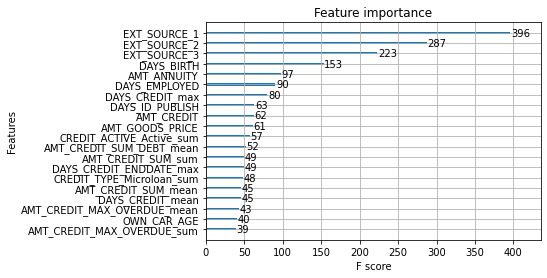

In [26]:
baseline_classification_model(classifier, X_train, y_train, X_test, y_test)